<a href="https://colab.research.google.com/github/cjsutton77/seismic_fd/blob/main/sligerland_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:

#  n+1         n                     n        n
# T     = s * T     + (1 - 2 * s) * T  + s * T
#  j           j-1                   j        j+1

# T(x + delta x) = T j + 1 -> t = n * delta t
# T(t + delta t) = T n + 1 -> x = j * delta x

In [3]:
dy = 0.0005
dt = 0.0005
viscosity = 2 * 10**-4
diffusion_number = viscosity * dt / (dy ** 2)
print(diffusion_number)


0.4000000000000001


In [4]:
y_max = 0.04
y = np.arange(0,y_max + dy,dy)
t = np.arange(0,1+dt,dt)

In [5]:
y[:10]

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045])

In [6]:
t[:10]

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045])

In [7]:
V = np.zeros((*t.shape,*y.shape))
V.shape

(2001, 81)

In [8]:
V[:,0] = 40

In [9]:

#  n+1         n                     n        n
# T     = s * T     + (1 - 2 * s) * T  + s * T
#  j           j-1                   j        j+1

# T(x + delta x) = T j + 1 -> t = n * delta t
# T(t + delta t) = T n + 1 -> x = j * delta x

In [10]:
for time_step in range(0,t.shape[0]-1):
  for y_step in range(1,y.shape[0]-1): # we need to go from 1, not 0
    V[time_step + 1,y_step] = diffusion_number * V[time_step,y_step - 1] \
                              + (1 - 2 * diffusion_number) * V[time_step,y_step] \
                              + diffusion_number * V[time_step,y_step + 1]

In [11]:
V.shape

(2001, 81)

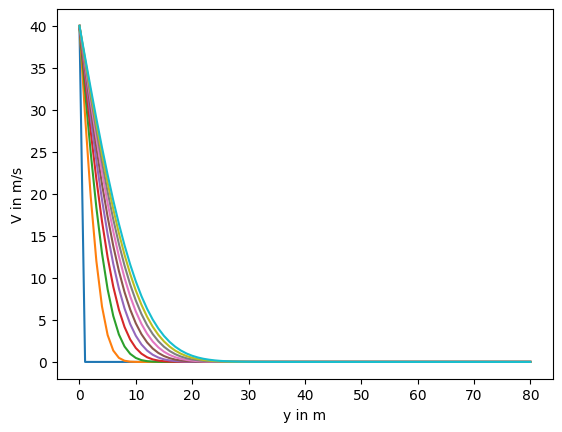

In [12]:
for i in range(0,100,10):
  plt.ylabel("V in m/s")
  plt.xlabel("y in m")
  #plt.title(f't = {i/1000}')
  plt.plot(V[i,:])
plt.show()